In [4]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def plot_pcap_exports(filepath, testname, title):
    # build file paths
    em1 = ("{}\\{}.em1.csv".format(filepath, testname))
    em2 = ("{}\\{}.em2.csv".format(filepath, testname))
    
    # read files into dataframe
    df1 = pd.read_csv(em1, sep=',')
    df2 = pd.read_csv(em2, sep=',')
    
    # filter out non-mptcp data
    df1.drop(df1.index[df1['Source'] != '172.16.1.2'], inplace=True)
    df1.drop(df1.index[df1['Destination'] != '172.16.3.2'], inplace=True)
    df2.drop(df2.index[df2['Source'] != '172.16.2.2'], inplace=True)
    df2.drop(df2.index[df2['Destination'] != '172.16.3.2'], inplace=True)
    
    # specify number of seconds to group data by
    group_by_seconds = 2
    
    # convert bytes to megabits
    df1['Length'] = df1['Length'] / 1024 / 1024 * 8 / group_by_seconds
    df2['Length'] = df2['Length'] / 1024 / 1024 * 8 / group_by_seconds
    
    # group data into intervals
    df1['Time'] = np.floor(df1['Time'] / group_by_seconds) * group_by_seconds
    df1 = df1.groupby(['Time']).sum()
    df2['Time'] = np.floor(df2['Time'] / group_by_seconds) * group_by_seconds
    df2 = df2.groupby(['Time']).sum()
    
    plt.plot(df1['Length'], label = "Flow 1")
    plt.plot(df2['Length'], label = "Flow 2")

    plt.legend(loc='best', ncol=2)

    plt.xlabel("Time (s)")
    plt.ylabel("Throughput (Mbps)")

    plt.ylim([0, 8])
    
    plt.title(title)
    
    plt.show()
    

# Scenario 1

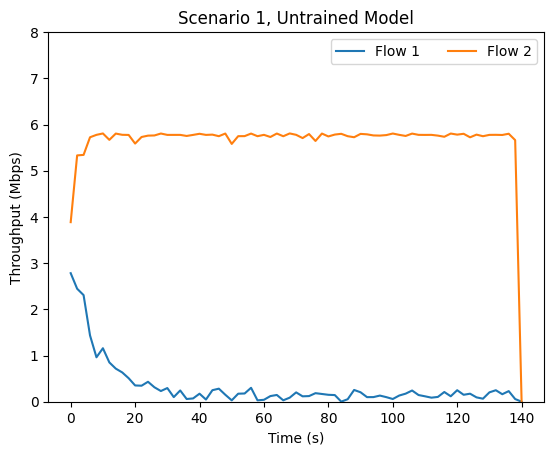

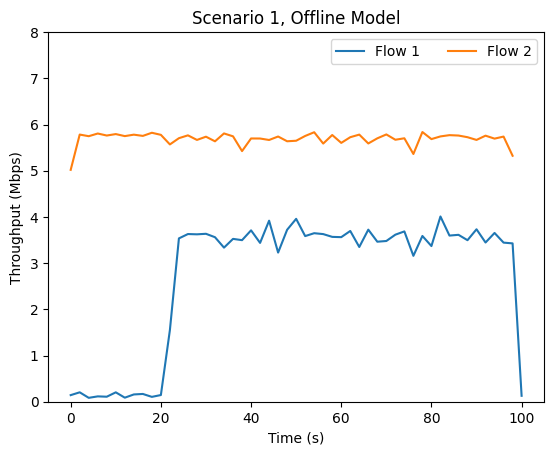

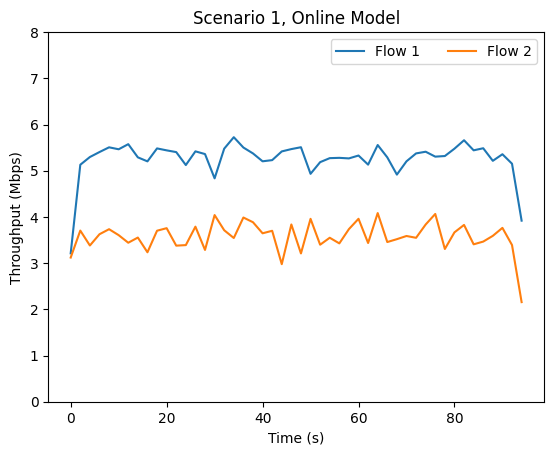

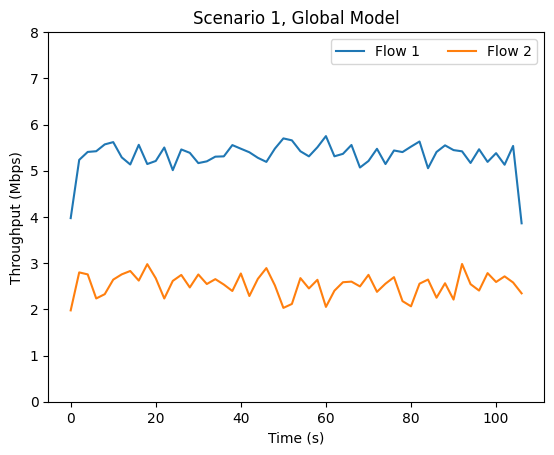

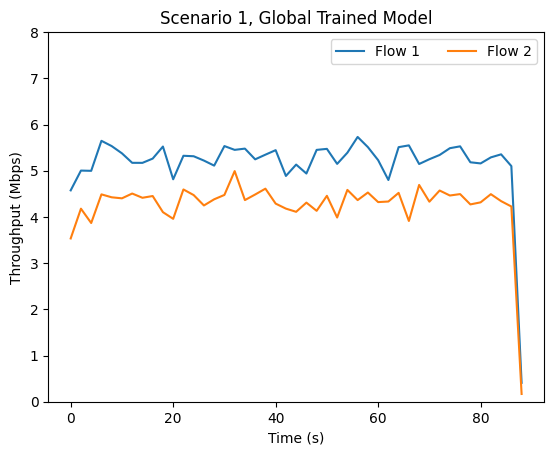

In [20]:
plot_pcap_exports("scenario1\\data", "untrained", "Scenario 1, Untrained Model")
plot_pcap_exports("scenario1\\data", "offline", "Scenario 1, Offline Model")
plot_pcap_exports("scenario1\\data", "online", "Scenario 1, Online Model")
plot_pcap_exports("scenario1\\data", "global", "Scenario 1, Global Model")
plot_pcap_exports("scenario1\\data", "global_trained", "Scenario 1, Global Trained Model")

# Scenario 2

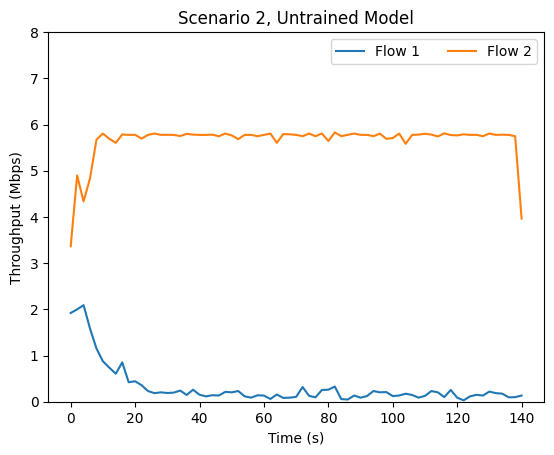

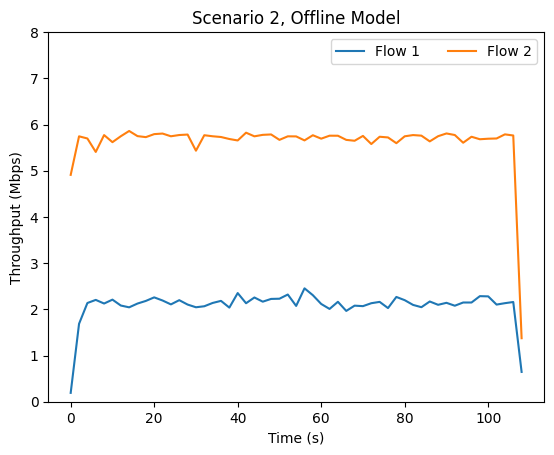

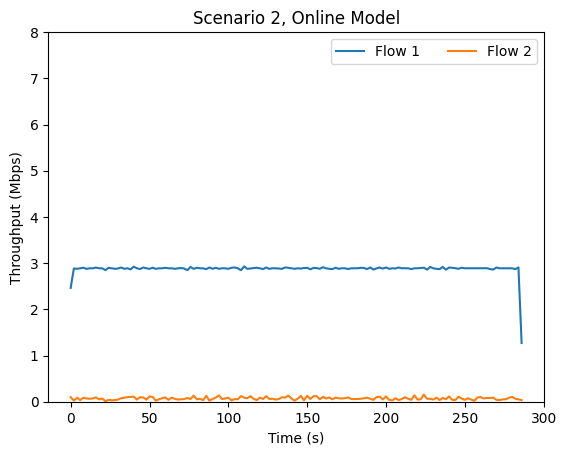

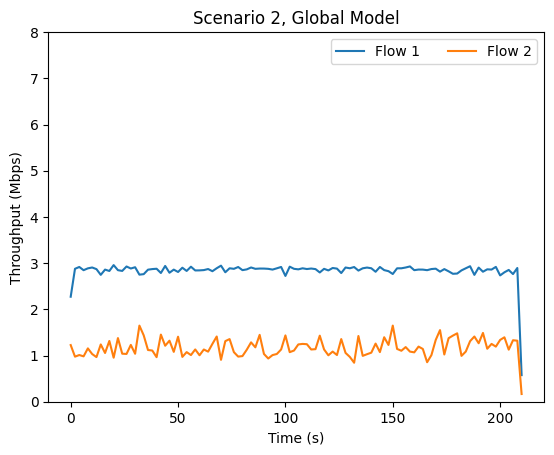

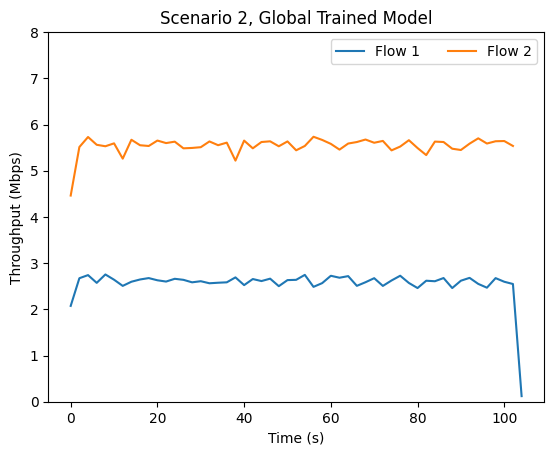

In [21]:
plot_pcap_exports("scenario2\\data", "untrained", "Scenario 2, Untrained Model")
plot_pcap_exports("scenario2\\data", "offline", "Scenario 2, Offline Model")
plot_pcap_exports("scenario2\\data", "online", "Scenario 2, Online Model")
plot_pcap_exports("scenario2\\data", "global", "Scenario 2, Global Model")
plot_pcap_exports("scenario2\\data", "global_trained", "Scenario 2, Global Trained Model")

# Scenario 3

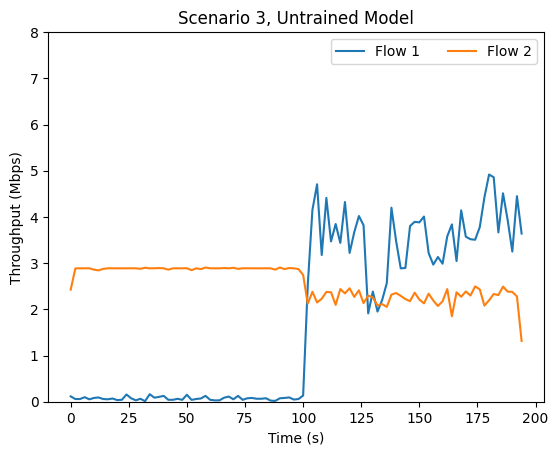

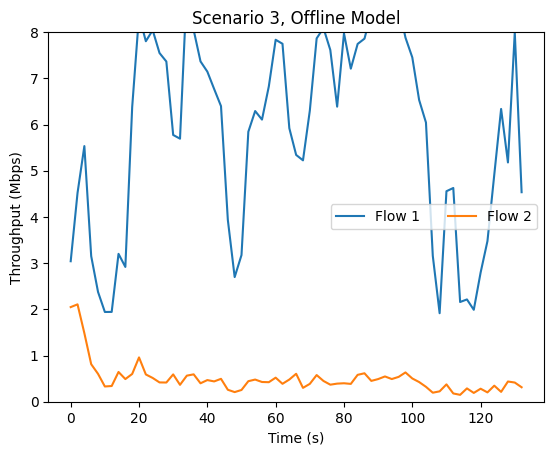

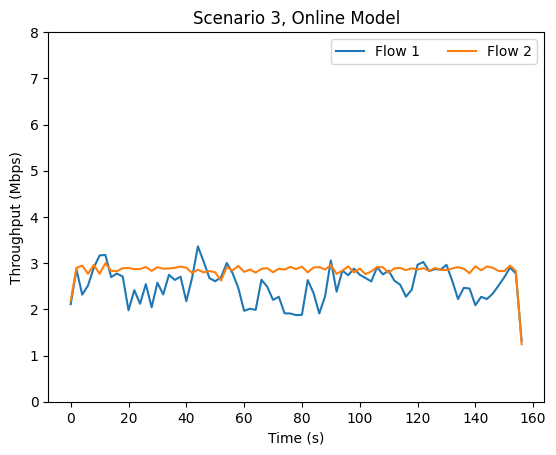

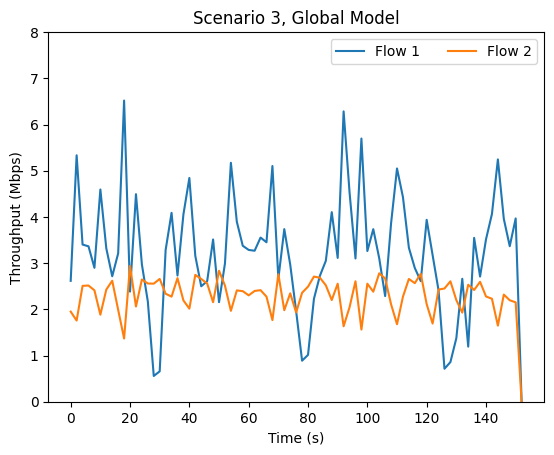

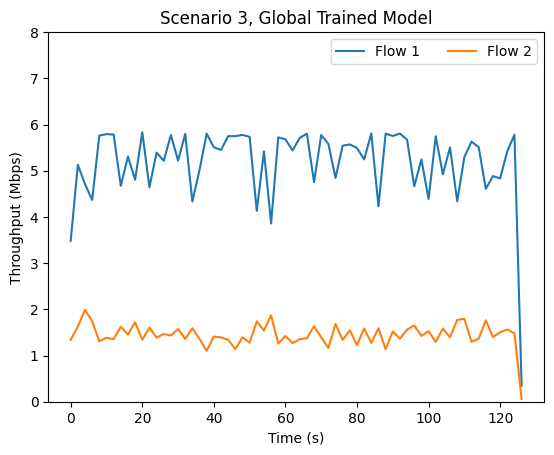

In [22]:
plot_pcap_exports("scenario3\\data", "untrained", "Scenario 3, Untrained Model")
plot_pcap_exports("scenario3\\data", "offline", "Scenario 3, Offline Model")
plot_pcap_exports("scenario3\\data", "online", "Scenario 3, Online Model")
plot_pcap_exports("scenario3\\data", "global", "Scenario 3, Global Model")
plot_pcap_exports("scenario3\\data", "global_trained", "Scenario 3, Global Trained Model")